# Analysis

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, norm
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Let's import the pre-cleaned data and run some summary statistics

### Entering the Data

In [2]:
data = pd.read_csv('merged2021Q1.csv', sep=",", header=0, dtype = {'LoanSeqNum': object})
data.sample(20)

,LoanSeqNum,CreditScore,MIPerc,CLTVRatio,DTIRatio,UPB,LTVRatio,IntRate,SellerName,DefaultFlag,DataSource
1091773,122780803,769,0,76,17,196000,76,2.375,"Wells Fargo Bank, N.A.",0,FannieMae
454325,F21Q12013898,692,0,65,39,194000,65,2.250,"NationStar Mortgage, LLC",0,FreddieMac
1020098,122640750,796,6,85,38,488000,85,2.000,Better Mortgage Corporation,0,FannieMae
1230928,123058995,788,0,49,46,447000,49,2.375,"Quicken Loans, LLC",0,FannieMae
282316,F21Q11749076,719,30,95,41,793000,95,2.750,Fairway Independent Mortgage Corporation,0,FreddieMac
901257,122373521,786,0,78,38,193000,78,3.375,"Wells Fargo Bank, N.A.",0,FannieMae
462675,F21Q12028257,760,0,75,20,101000,75,3.000,"AmeriHome Mortgage Company, LLC",0,FreddieMac
109376,F21Q11472554,776,0,80,44,180000,80,2.875,PennyMac Corp.,0,FreddieMac
386950,F21Q11910652,774,0,48,29,200000,48,2.000,"Citizens Bank, N.A.",0,FreddieMac
1400887,123418777,752,0,60,50,425000,60,2.500,PennyMac Corp.,0,FannieMae


## Exploratory Data Analysis

Let's look at some (relative) histograms of our important variables.

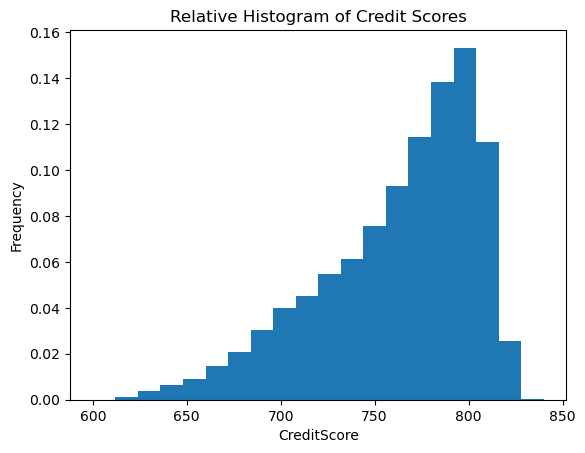

In [3]:
# Credit Score
plt.hist(data['CreditScore'], bins=20, weights=np.ones(data.shape[0])/data.shape[0])

plt.title("Relative Histogram of Credit Scores")
plt.xlabel("CreditScore")
plt.ylabel("Frequency")
plt.show()

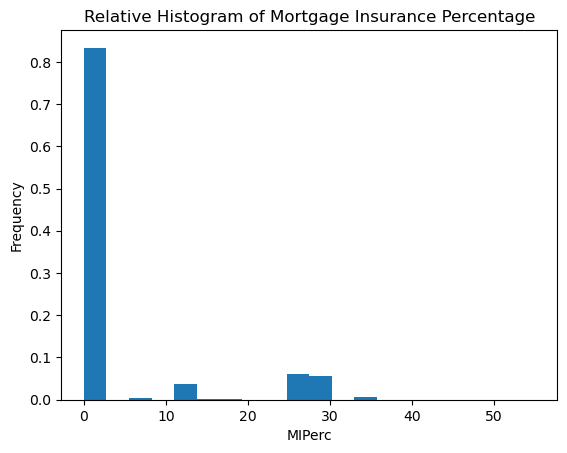

In [4]:
#Mortgage Insurance Percentage
plt.hist(data['MIPerc'], bins=20, weights=np.ones(data.shape[0])/data.shape[0])

plt.title("Relative Histogram of Mortgage Insurance Percentage")
plt.xlabel("MIPerc")
plt.ylabel("Frequency")
plt.show()

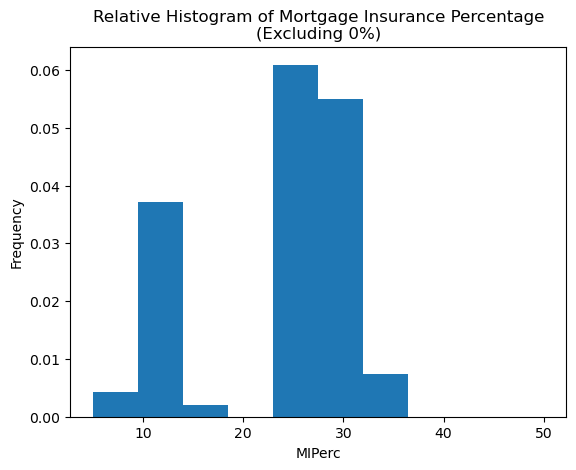

In [5]:
#Mortgage Insurance Percentage (excluding 0)
plt.hist(data['MIPerc'], range = (5,50), bins=10, weights=np.ones(data.shape[0])/data.shape[0])

plt.title("Relative Histogram of Mortgage Insurance Percentage\n(Excluding 0%)")
plt.xlabel("MIPerc")
plt.ylabel("Frequency")
plt.show()

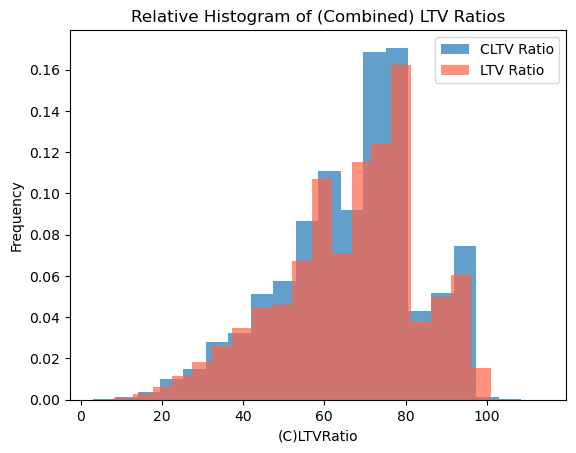

In [10]:
#Combined Loan-to-Value and Loan-to-Value Ratio
plt.hist(data['CLTVRatio'], bins=20, weights=np.ones(data.shape[0])/data.shape[0], alpha=0.7)
plt.hist(data['LTVRatio'], bins=20, weights=np.ones(data.shape[0])/data.shape[0], alpha=0.7, color='tomato')

plt.title("Relative Histogram of (Combined) LTV Ratios")
plt.xlabel("(C)LTVRatio")
plt.ylabel("Frequency")
plt.legend(['CLTV Ratio', 'LTV Ratio'])
plt.show()

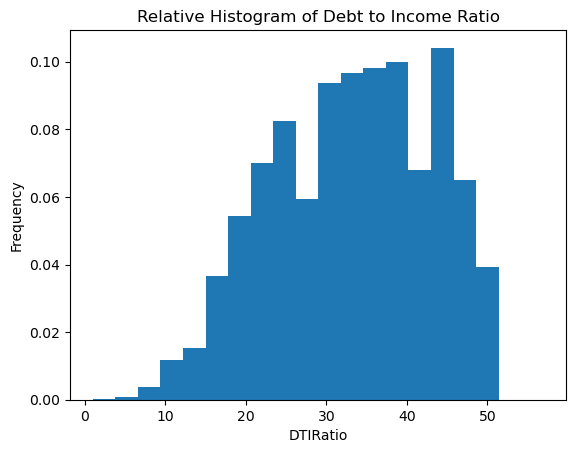

In [11]:
#Debt-to-Income Ratio
plt.hist(data['DTIRatio'], bins=20, weights=np.ones(data.shape[0])/data.shape[0])

plt.title("Relative Histogram of Debt to Income Ratio")
plt.xlabel("DTIRatio")
plt.ylabel("Frequency")
plt.show()

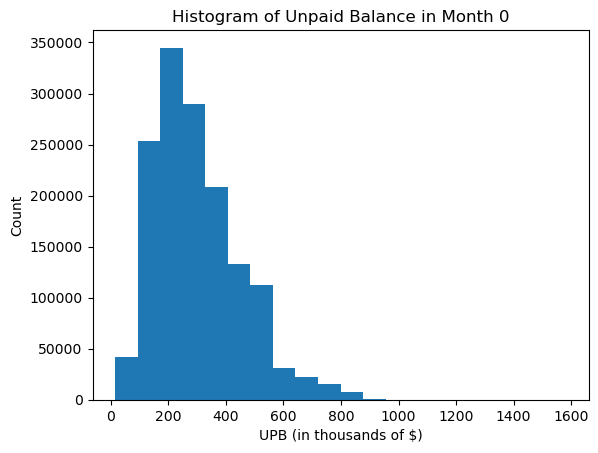

In [14]:
#Unpaid Balance
plt.hist(data['UPB']/1000, bins=20)

plt.title("Histogram of Unpaid Balance in Month 0")
plt.xlabel("UPB (in thousands of $)")
plt.ylabel("Count")
plt.show()

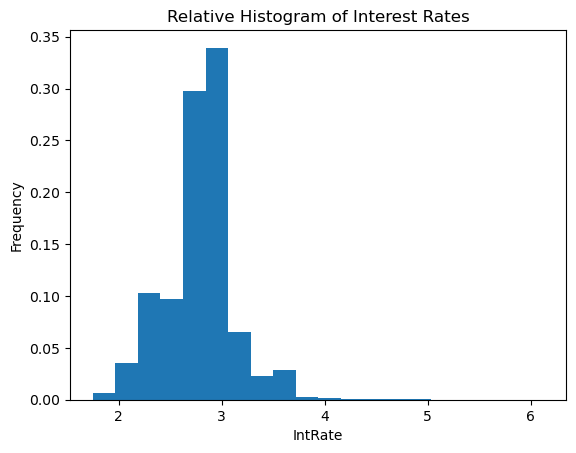

In [19]:
#Interest Rate
plt.hist(data['IntRate'], bins=20, weights=np.ones(data.shape[0])/data.shape[0])

plt.title("Relative Histogram of Interest Rates")
plt.xlabel("IntRate")
plt.ylabel("Frequency")
plt.show()

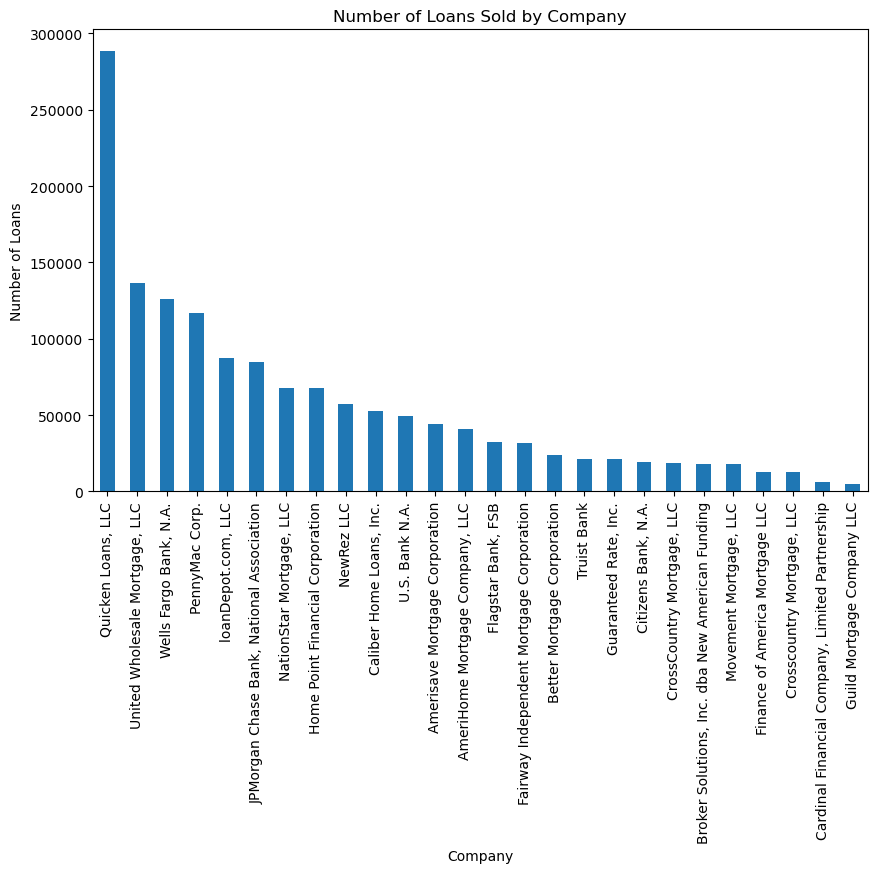

In [25]:
#Sellers
seller_counts = data['SellerName'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
seller_counts.plot(kind='bar')
plt.title('Number of Loans Sold by Company')
plt.xlabel('Company')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
plt.show()

In [30]:
##Binary Variables
print("Overall Default Rate: {:.3f}%".format(100*sum(data['DefaultFlag'])/data.shape[0]))
print("Loans from Freddie Mac: {:.3f}%".format(100*sum(data['DataSource'] == 'FreddieMac')/data.shape[0]))
print("Loans from Fannie Mae: {:.3f}%".format(100*sum(data['DataSource'] == 'FannieMae')/data.shape[0]))

Overall Default Rate: 1.379%
Loans from Freddie Mac: 52.709%
Loans from Fannie Mae: 47.291%


## Z-test on Default Rates

I took inspiration from one of the papers I read. They divided up various numerical variables into quantiles, established the 0th as the baseline group and then used z-tests to show that the default rates were significantly different between groups. This showed that certain numerical variables had statistical predictive power without having to run a regression. Normal linear regression might be difficult given 'DefaultFlag' is a binary outcome variable. We predict on 'CLTVRatio', 'DTIRatio', 'CreditScore', and 'IntRate'.

We can also run something similar the categorical variables, but we don't have to deal with quantiles, since the data is already categorized for us.

### Numerical Variables

In [110]:
def formatPValue(pVal):
    # Format p-value for display with asterisks
    if pVal == '':
        return ''
    elif pVal < 1e-15:
        return "<1e-10***"
    elif pVal > 0.1:
        return f"{pVal:.4f}"
    elif pVal <= 0.1 and pVal > 0.05:
        return f"{pVal:.4f}*"
    elif pVal <= 0.05 and pVal > 0.01:
        return f"{pVal:.4f}**"
        return f"{pVal:.4f}**"
    elif pVal <= 0.01:
        if pVal <= 1e-3:
            return f"{pVal:.2e}***"
        else:
            return f"{pVal:.4e}***"

def analyzeNumVar(df, numericalVar, defaultVar='DefaultFlag'):
    # Divide dataset into quantiles (we use quintiles as a default)
    df['Quintile'] = pd.qcut(df[numericalVar], 5, labels=False)
    
    # Calculate default rates for each quantile
    quintileDefaults = df.groupby('Quintile')[defaultVar].mean()
    quintileCounts = df['Quintile'].value_counts().sort_index()

    results = []
    
    # Baseline group is the lowest quantile (0th quantile)
    baselineDefaultRate = quintileDefaults.iloc[0]
    baselineCount = quintileCounts.iloc[0]
    results.append((f'Quintile 0', baselineDefaultRate, baselineCount, 'Baseline', ''))
    
    # Perform z-tests
    for quintile in range(1, 5):
        testGroup = df[df['Quintile'] == quintile][defaultVar]
        baselineGroup = df[df['Quintile'] == 0][defaultVar]
        
        # Assuming large sample size (each group has 1000s of entries), z-test is good enough
        zStat, pVal = sms.proportions_ztest([testGroup.sum(), baselineGroup.sum()],
                                              [testGroup.count(), baselineGroup.count()])
        
        defaultRate = quintileDefaults.iloc[quintile]
        count = quintileCounts.iloc[quintile]
        results.append((f'Quintile {quintile}', defaultRate, count, zStat, pVal))
    
    # Print results
    print(f'{"Group":<15} {"Default Rate":<15} {"Count":<10} {"Z-Statistic":<15} {"P-Value":<15}')
    print(f'{results[0][0]:<15} {results[0][1]:<15.2%} {results[0][2]:<10} {results[0][3]:<15} {formatPValue(results[0][4]):<15}')
    for res in results[1:]:
        print(f'{res[0]:<15} {res[1]:<15.2%} {res[2]:<10} {res[3]:<15.4f} {formatPValue(res[4]):<15}')

    df = df.drop(columns='Quintile')

In [111]:
numVarToAnalyze = ['CLTVRatio', 'DTIRatio', 'CreditScore', 'IntRate']

for var in numVarToAnalyze:
    print(var)
    analyzeNumVar(data, var)
    print("\n")

CLTVRatio
Group           Default Rate    Count      Z-Statistic     P-Value        
Quintile 0      0.70%           308294     Baseline                       
Quintile 1      0.95%           296371     10.7804         <1e-10***      
Quintile 2      1.20%           271220     19.6094         <1e-10***      
Quintile 3      1.53%           333179     31.3192         <1e-10***      
Quintile 4      2.73%           249991     59.8887         <1e-10***      


DTIRatio
Group           Default Rate    Count      Z-Statistic     P-Value        
Quintile 0      0.66%           319982     Baseline                       
Quintile 1      1.00%           305871     14.7316         <1e-10***      
Quintile 2      1.46%           283927     30.6107         <1e-10***      
Quintile 3      1.95%           295306     45.0536         <1e-10***      
Quintile 4      1.99%           253969     45.2096         <1e-10***      


CreditScore
Group           Default Rate    Count      Z-Statistic     P-Valu

### Categorical Variables

In [108]:
def analyzeCatVar(df, categoricalVar, defaultVar='DefaultFlag'):
    # Identify the largest group
    largestSeller = df[categoricalVar].value_counts().idxmax()
    baselineGroup = df[df[categoricalVar] == largestSeller]
    baselineCount = baselineGroup[defaultVar].count()
    
    results = []

    # Baseline group
    baselineDefaultRate = baselineGroup[defaultVar].mean()
    results.append((largestSeller, baselineDefaultRate, baselineCount, 'Baseline', ''))
    
    # Compare other sellers against the largest seller
    for seller in df[categoricalVar].unique():
        if seller == largestSeller:
            continue
        
        testGroup = df[df[categoricalVar] == seller][defaultVar]
        
        # Assuming normal distribution and large sample size, we use z-test
        zStat, pVal = sms.proportions_ztest([testGroup.sum(), baselineGroup[defaultVar].sum()],
                                              [testGroup.count(), baselineGroup[defaultVar].count()])
        
        defaultRate = testGroup.mean()
        count = testGroup.count()
        results.append((seller, defaultRate, count, zStat, pVal))

    results.sort(key=lambda x: x[2], reverse=True)
    
    # Print results
    spacing = 50 if categoricalVar == 'SellerName' else 15
    print(f'{"Group":<{spacing}} {"Default Rate":<15} {"Count":<10} {"Z-Statistic":<15} {"P-Value":<15}')
    print(f'{results[0][0]:<{spacing}} {results[0][1]:<15.2%} {results[0][2]:<10} {results[0][3]:<15} {formatPValue(results[0][4]):<15}')
    for res in results[1:]:
        print(f'{res[0]:<{spacing}} {res[1]:<15.2%} {res[2]:<10} {res[3]:<15.4f} {formatPValue(res[4]):<15}')

In [113]:
catVarToAnalyze = ['SellerName', 'DataSource']

for var in catVarToAnalyze:
    print(var)
    analyzeCatVar(data, var)
    print("\n")

SellerName
Group                                              Default Rate    Count      Z-Statistic     P-Value        
Quicken Loans, LLC                                 1.18%           288276     Baseline                       
United Wholesale Mortgage, LLC                     1.91%           136477     18.6167         <1e-10***      
Wells Fargo Bank, N.A.                             1.22%           126014     1.0370          0.2997         
PennyMac Corp.                                     1.33%           116858     3.9298          8.50e-05***    
loanDepot.com, LLC                                 1.30%           87342      2.8597          4.2401e-03***  
JPMorgan Chase Bank, National Association          0.74%           84878      -10.9109        <1e-10***      
NationStar Mortgage, LLC                           1.47%           67663      5.9905          2.09e-09***    
Home Point Financial Corporation                   1.52%           67632      7.1322          9.88e-13***    

## Logisitic Models

### Model 1 (no Seller information)
Our first model will try to predict defaults based on 'CreditScore', 'MIPerc', 'CLTVRatio' ,'DTIRatio', 'UPB', 'LTVRatio', 'IntRate'. We use the statsmodel package for this.

In [187]:
#Dependent and independent variables 
Xtrain = data[['CreditScore', 'MIPerc', 'CLTVRatio' ,'DTIRatio', 'UPB', 'IntRate']] 
   
# building the model and fitting the data 
logReg1 = sm.Logit(data['DefaultFlag'], Xtrain).fit() 

print(logReg1.summary()) 

Optimization terminated successfully.
         Current function value: 0.066978
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            DefaultFlag   No. Observations:              1459055
Model:                          Logit   Df Residuals:                  1459049
Method:                           MLE   Df Model:                            5
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                 0.07974
Time:                        13:47:06   Log-Likelihood:                -97725.
converged:                       True   LL-Null:                   -1.0619e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
CreditScore    -0.0115   7.72e-05   -149.430      0.000      -0.012      -0.011
MIPerc          0.0122    

### Model 2 (with Seller information)

First, we wil have to identify each of the 20-something companies above by FinTech or not FinTech, and then merge it in with our data

In [189]:
finTechData = pd.read_csv('finTechList.csv', sep=",")

In [190]:
data = data.merge(finTechData, on='SellerName')

In [191]:
#Dependent and independent variables 
Xtrain = data[['CreditScore', 'MIPerc', 'CLTVRatio' ,'DTIRatio', 'UPB', 'IntRate', 'FinTech']] 
   
# building the model and fitting the data 
logReg2 = sm.Logit(data['DefaultFlag'], Xtrain).fit() 

print(logReg2.summary()) 

Optimization terminated successfully.
         Current function value: 0.066972
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            DefaultFlag   No. Observations:              1459055
Model:                          Logit   Df Residuals:                  1459048
Method:                           MLE   Df Model:                            6
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                 0.07982
Time:                        13:47:23   Log-Likelihood:                -97716.
converged:                       True   LL-Null:                   -1.0619e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
CreditScore    -0.0115   7.72e-05   -149.064      0.000      -0.012      -0.011
MIPerc          0.0121    

We can compute a median effect size here.

In [204]:
median=Xtrain.median()
initial = logReg2.predict(median)
median['FinTech'] = 1
final = logReg2.predict(median)
final-initial

None   -0.000489
dtype: float64